In [1]:
# Import MNIST data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
x_train =mnist.train.images
y_train = mnist.train.labels

x_test = mnist.test.images
y_test = mnist.test.labels

In [4]:
np.shape(x_train)

(55000, 784)

In [5]:
np.shape(x_test)

(10000, 784)

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


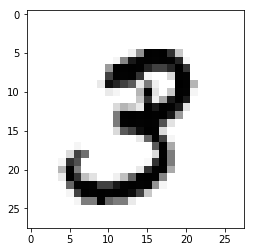

In [6]:
plt.imshow(x_train[1].reshape(28,28), cmap='Greys')
print("Label:" , y_train[1])

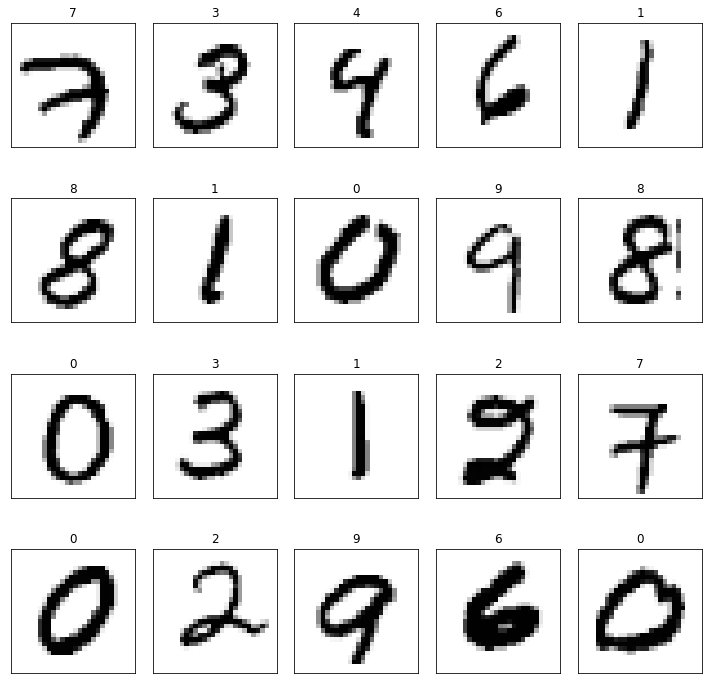

In [7]:
fig = plt.figure(figsize=(10,10))

for i in range(20):    
    subplot = fig.add_subplot(4, 5, i + 1)
    
    subplot.set_xticks([])
    subplot.set_yticks([])

    subplot.set_title('%d' % np.argmax(y_train[i]))
    subplot.imshow(x_train[i].reshape(28,28), cmap='Greys')

plt.tight_layout()
plt.show()

In [8]:
num_classes =10

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

n_hidden_1 = 128
n_hidden_2 = 128

In [9]:
layer_1 = tf.layers.dense(X, n_hidden_1, activation=tf.nn.relu)
layer_2 = tf.layers.dense(layer_1, n_hidden_2, activation=tf.nn.relu)
out_layer = tf.layers.dense(layer_2, num_classes)

In [10]:
# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
loss = tf.losses.sigmoid_cross_entropy(multi_class_labels=Y, logits=out_layer)
optimizer = tf.train.AdamOptimizer(0.01).minimize(loss)

In [11]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [12]:
batch_size = 128
total_batch = int(len(x_train)/batch_size)

for epoch in range(10):
    total_loss = 0
    for i in range(total_batch):            
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, loss_val = sess.run([optimizer, loss], feed_dict={X: batch_xs, Y: batch_ys})
        total_loss += loss_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. loss =', '{:.3f}'.format(total_loss / total_batch))

Epoch: 0001 Avg. loss = 0.049
Epoch: 0002 Avg. loss = 0.023
Epoch: 0003 Avg. loss = 0.018
Epoch: 0004 Avg. loss = 0.014
Epoch: 0005 Avg. loss = 0.013
Epoch: 0006 Avg. loss = 0.012
Epoch: 0007 Avg. loss = 0.011
Epoch: 0008 Avg. loss = 0.011
Epoch: 0009 Avg. loss = 0.010
Epoch: 0010 Avg. loss = 0.009


In [13]:
is_correct = tf.equal(tf.argmax(out_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('Accuracy:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images,
                                   Y: mnist.test.labels}))

Accuracy: 0.974
